In [ ]:
!pip install retina-face

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14933 sha256=6763c756c5b8d41737bd9e1b07f9fd0b01695450092fd418652d65dc48554979
  Stored in directory: /home/priyam/.cache/pip/wheels/b8/79/f0/b523d25d96b0bbb12bb024b97940d08c4fcd498a00070c8d82
Successfully built gdown


In [19]:
from retinaface import RetinaFace

In [53]:
import cv2
img_path ='/home/priyam/Downloads/test_image.jpg'
img = cv2.imread(img_path)
obj = RetinaFace.detect_faces(img_path)

In [84]:
obj.keys()

dict_keys(['face_1', 'face_2', 'face_3', 'face_4', 'face_5', 'face_6', 'face_7', 'face_8', 'face_9', 'face_10', 'face_11', 'face_12', 'face_13', 'face_14', 'face_15', 'face_16', 'face_17', 'face_18', 'face_19', 'face_20', 'face_21', 'face_22', 'face_23', 'face_24', 'face_25', 'face_26', 'face_27', 'face_28', 'face_29', 'face_30', 'face_31', 'face_32', 'face_33', 'face_34', 'face_35', 'face_36', 'face_37', 'face_38', 'face_39', 'face_40', 'face_41', 'face_42', 'face_43', 'face_44', 'face_45', 'face_46', 'face_47', 'face_48'])

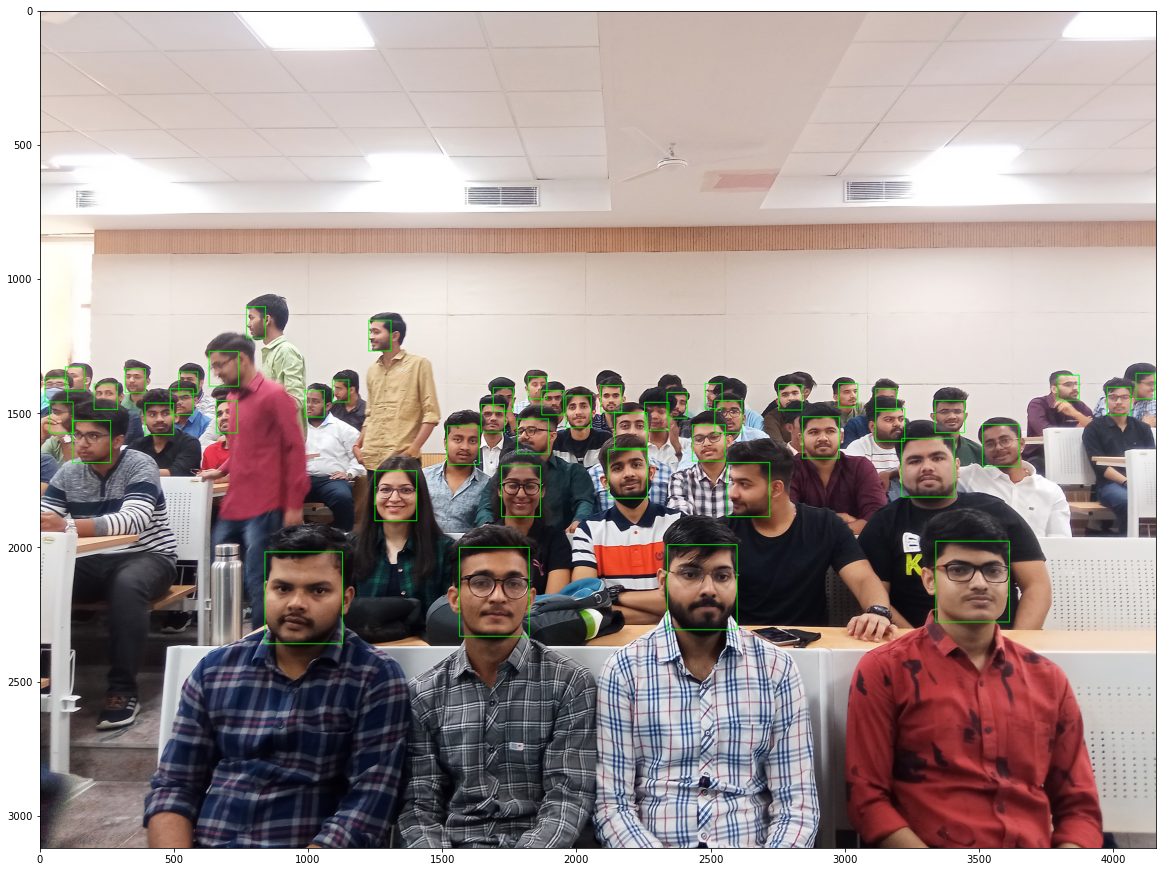

In [55]:
import os
import matplotlib.pyplot as plt
faces_lst = []
for key in obj.keys():
    identity = obj[key]
    facial_area = identity['facial_area']
    faces_lst.append((facial_area[0], facial_area[1], facial_area[2], facial_area[3])) 
os.mkdir("/home/priyam/Downloads/test_data")
store_dr = "/home/priyam/Downloads/test_data"
face_names = list(obj.keys())
for (x,y,w,h) in faces_lst:
    name = faces_lst.index((x,y,w,h))
    f = img[y:h, x:w]
    face = cv2.resize(f, (224,224))
    cv2.imwrite(store_dr +'/'+ face_names[name] + '_faces.jpg', face)
for key in obj.keys():
    identity = obj[key]
    facial_area = identity['facial_area']
    cv2.rectangle(img, (facial_area[2], facial_area[3]), (facial_area[0], facial_area[1]), (0, 255, 0), 2)
plt.figure(figsize=(20,20))
plt.imshow(img[:, :, ::-1])
plt.show()

## Face Recognition

In [57]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import tensorflow as tf
store_dir = "/home/priyam/Downloads/Dataset-20221104T163302Z-001/Dataset"
val_dir = '/home/priyam/Downloads/Database/Database'
# Using data augmentation
IMG_HEIGHT, IMG_WIDTH = 224, 224
Train_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=preprocess_input)
train_generator = Train_Datagen.flow_from_directory(
    store_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size = 16,
    class_mode = 'categorical' 
) 
Validation_Datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=preprocess_input)
val_generator = Validation_Datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size = 16,
    class_mode = 'categorical' 
) 

Found 11733 images belonging to 46 classes.
Found 368 images belonging to 46 classes.


In [70]:
# resnet_model = Sequential()
import tensorflow as tf
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(IMG_HEIGHT,IMG_WIDTH,3),
                   weights='imagenet')
for layer in pretrained_model.layers[:-5]:
        layer.trainable=False

In [71]:
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [72]:
cnn_model1 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(46, activation='softmax')
])
cnn_model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               51380736  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 46)                23598     
                                                                 
Total params: 74,992,046
Trainable params: 52,459,054
Non-trainable params: 22,532,992
_________________________________________________________________


In [73]:
cnn_model1.compile(loss="categorical_crossentropy",
                  optimizer='adam',
                  metrics=['accuracy'])

In [74]:
history = cnn_model1.fit_generator(train_generator, validation_data=val_generator, epochs=20)

Epoch 1/20
734/734 [==============================] - 745s 1s/step - loss: 2.1679 - accuracy: 0.6425 - val_loss: 2.4900 - val_accuracy: 0.5245
Epoch 2/20
734/734 [==============================] - 737s 1s/step - loss: 0.4846 - accuracy: 0.8782 - val_loss: 2.8643 - val_accuracy: 0.4755
Epoch 3/20
734/734 [==============================] - 735s 1s/step - loss: 0.4462 - accuracy: 0.8981 - val_loss: 2.7075 - val_accuracy: 0.5679
Epoch 4/20
734/734 [==============================] - 730s 994ms/step - loss: 0.3629 - accuracy: 0.9247 - val_loss: 2.6488 - val_accuracy: 0.6549
Epoch 5/20
734/734 [==============================] - 731s 996ms/step - loss: 0.2998 - accuracy: 0.9409 - val_loss: 4.1140 - val_accuracy: 0.5489
Epoch 6/20
734/734 [==============================] - 731s 995ms/step - loss: 0.3069 - accuracy: 0.9419 - val_loss: 3.4678 - val_accuracy: 0.6359
Epoch 7/20
734/734 [==============================] - 736s 1s/step - loss: 0.3215 - accuracy: 0.9506 - val_loss: 4.4879 - val_accurac

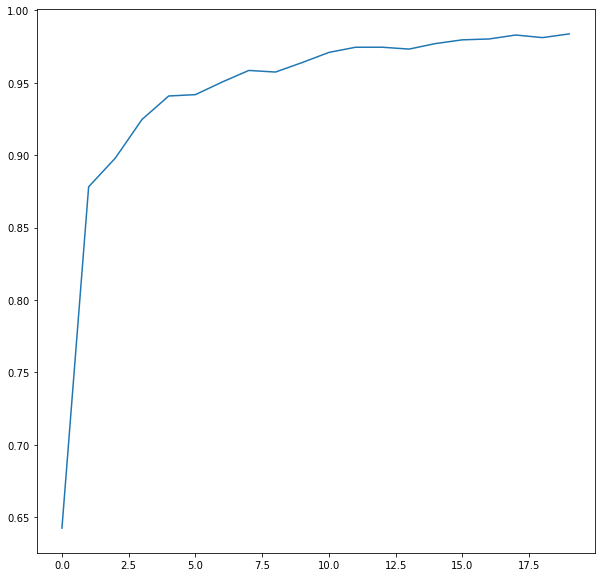

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])

In [78]:
classes = train_generator.class_indices

1/1 [==============================] - 0s 115ms/step
['20235' '20238' '20212' '20221' '20220']
1/1 [==============================] - 0s 110ms/step
['20234' '20238' '20229' '20232' '20204']
1/1 [==============================] - 0s 159ms/step
['20241' '20249' '20212' '20221' '20220']
1/1 [==============================] - 0s 97ms/step
['20211' '20249' '20213' '20222' '20221']
1/1 [==============================] - 0s 108ms/step
['20233' '20249' '20213' '20221' '20220']
1/1 [==============================] - 0s 154ms/step
['20219' '20249' '20213' '20222' '20221']
1/1 [==============================] - 0s 99ms/step
['20211' '20238' '20230' '20236' '20206']


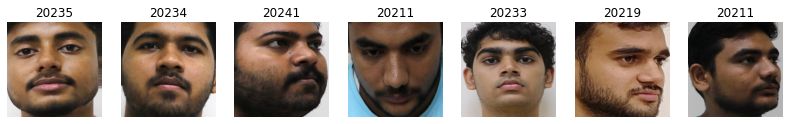

In [87]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import os
test_dir = '/home/priyam/Downloads/test_data_1'
rows = 8
columns = 10
fig = plt.figure(figsize=(20,20))
idx = 1
lst = []
for i in os.listdir(test_dir):
    img_path = os.path.join(test_dir,i)
    img_plot = cv2.imread(os.path.join(test_dir,i))
    img_plot = cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB)
    img_plot = cv2.resize(img_plot, (224, 224))
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds=cnn_model1.predict(x)
    preds = preds.reshape(46)
    a_sort = np.flip(np.argsort(preds))[:5]
    class_labels = list(classes.keys())
    class_labels = np.array(class_labels)
    print(class_labels[a_sort])
    pred = np.argmax(preds, axis=-1)
    label = class_labels[pred]
    fig.add_subplot(rows, columns, idx)
    plt.imshow(img_plot)
    plt.axis('off')
    plt.title(label)
    lst.append(label)
    idx+=1